In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from keras import layers, models
from keras.utils import to_categorical
from keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, BatchNormalization, Activation,GlobalAveragePooling2D
from keras.optimizers import Adam
from keras.preprocessing.image import img_to_array, array_to_img
from keras.applications import ResNet50

In [2]:
# Load MNIST data
from keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [3]:
from skimage.transform import resize  # Correct import for resize

train_images_resized = np.array([resize(img_to_array(image), (32, 32, 3)) for image in train_images])
test_images_resized = np.array([resize(img_to_array(image), (32, 32, 3)) for image in test_images])

In [4]:
# Normalize pixel values to be between 0 and 1
train_images_rgb = train_images_resized.astype('float32') / 255
test_images_rgb = test_images_resized.astype('float32') / 255

In [5]:
# Convert labels to one-hot encoding
train_labels_one_hot = to_categorical(train_labels)
test_labels_one_hot = to_categorical(test_labels)

# Resnet 50 architecture

In [6]:
# Create ResNet-50 model
model = Sequential()

# Stage 1
model.add(Conv2D(64, kernel_size=(7, 7), strides=(2, 2), padding='same', input_shape=(32, 32, 3)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(3, 3), strides=(2, 2), padding='same'))

# Stage 2
model.add(Conv2D(64, kernel_size=(1, 1), strides=(1, 1), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Conv2D(64, kernel_size=(3, 3), strides=(1, 1), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Conv2D(256, kernel_size=(1, 1), strides=(1, 1), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))

# Stage 3
model.add(Conv2D(128, kernel_size=(1, 1), strides=(2, 2), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Conv2D(128, kernel_size=(3, 3), strides=(1, 1), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Conv2D(512, kernel_size=(1, 1), strides=(1, 1), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))

# Stage 4
model.add(Conv2D(256, kernel_size=(1, 1), strides=(2, 2), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Conv2D(256, kernel_size=(3, 3), strides=(1, 1), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Conv2D(1024, kernel_size=(1, 1), strides=(1, 1), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))

# Stage 5
model.add(Conv2D(512, kernel_size=(1, 1), strides=(2, 2), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Conv2D(512, kernel_size=(3, 3), strides=(1, 1), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Conv2D(2048, kernel_size=(1, 1), strides=(1, 1), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))

# Pooling and flattening
model.add(GlobalAveragePooling2D())
model.add(Flatten())

# Dense layers
model.add(Dense(units=1000, activation='relu'))
model.add(Dense(units=1000, activation='relu'))
model.add(Dense(units=10, activation='softmax'))


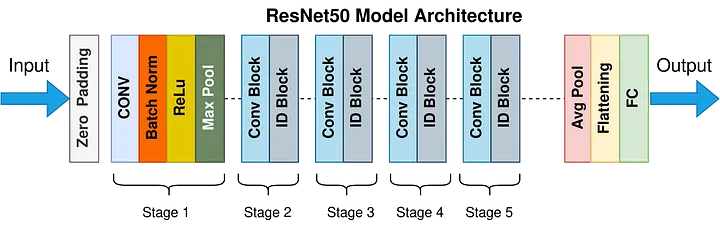

In [7]:
# Compile the model
model.compile(
    loss='categorical_crossentropy',
    optimizer=Adam(),
    metrics=['accuracy']
)

In [8]:
# Train the model
history = model.fit(train_images_rgb, train_labels_one_hot, epochs=5, batch_size=64, validation_data=(test_images_rgb, test_labels_one_hot))

Epoch 1/5
938/938 [==============================] - 29s 17ms/step - loss: 0.2205 - accuracy: 0.9432 - val_loss: 0.0946 - val_accuracy: 0.9778
Epoch 2/5
938/938 [==============================] - 14s 14ms/step - loss: 0.1021 - accuracy: 0.9754 - val_loss: 0.1095 - val_accuracy: 0.9774
Epoch 3/5
938/938 [==============================] - 14s 15ms/step - loss: 0.0834 - accuracy: 0.9805 - val_loss: 0.1615 - val_accuracy: 0.9674
Epoch 4/5
938/938 [==============================] - 16s 17ms/step - loss: 0.0704 - accuracy: 0.9839 - val_loss: 0.0727 - val_accuracy: 0.9850
Epoch 5/5
938/938 [==============================] - 14s 15ms/step - loss: 0.0706 - accuracy: 0.9838 - val_loss: 0.0934 - val_accuracy: 0.9810


In [9]:
# Display the model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 16, 16, 64)        9472      
                                                                 
 batch_normalization (Batch  (None, 16, 16, 64)        256       
 Normalization)                                                  
                                                                 
 activation (Activation)     (None, 16, 16, 64)        0         
                                                                 
 max_pooling2d (MaxPooling2  (None, 8, 8, 64)          0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 8, 8, 64)          4160      
                                                                 
 batch_normalization_1 (Bat  (None, 8, 8, 64)          2

In [10]:
# Evaluate the model
test_loss, test_acc = model.evaluate(test_images_rgb, test_labels_one_hot)
print(f'Test accuracy: {test_acc * 100:.2f}%')

313/313 [==============================] - 2s 5ms/step - loss: 0.0934 - accuracy: 0.9810
Test accuracy: 98.10%


In [11]:
# Make predictions
predictions = model.predict(test_images_rgb)

313/313 [==============================] - 1s 3ms/step


In [12]:
# Make predictions
y_predicted = model.predict(test_images_rgb)

313/313 [==============================] - 1s 3ms/step


In [13]:
y_predicted=[np.argmax(i) for i in y_predicted]

In [14]:
y_test=[np.argmax(i) for i in test_labels_one_hot]

In [15]:
con_matrix=confusion_matrix(y_test,y_predicted)

Text(0.5, 23.52222222222222, 'Predicted')

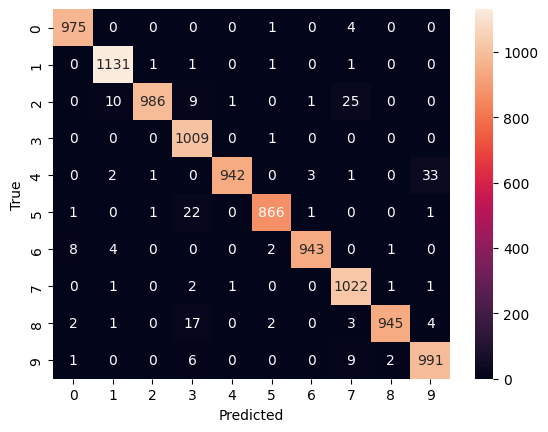

In [16]:
sns.heatmap(con_matrix,annot=True,fmt="d")
plt.ylabel('True')
plt.xlabel('Predicted')

In [17]:
CR=classification_report(y_test,y_predicted)
print(CR)

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       0.98      1.00      0.99      1135
           2       1.00      0.96      0.98      1032
           3       0.95      1.00      0.97      1010
           4       1.00      0.96      0.98       982
           5       0.99      0.97      0.98       892
           6       0.99      0.98      0.99       958
           7       0.96      0.99      0.98      1028
           8       1.00      0.97      0.98       974
           9       0.96      0.98      0.97      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



# part 2 using skip connection(shortcut connection)

In [18]:
# Convert class vectors to binary class matrices
y_train = to_categorical(train_labels, 10)
y_test = to_categorical(test_labels, 10)

In [19]:
def identity_block(x, filters, kernel_size=3):
    # Identity block: no convolutional layer at shortcut
    x_shortcut = x

    x = Conv2D(filters, kernel_size=(1, 1), strides=(1, 1), padding='valid')(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)

    x = Conv2D(filters, kernel_size=(kernel_size, kernel_size), strides=(1, 1), padding='same')(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)

    x = Conv2D(filters * 4, kernel_size=(1, 1), strides=(1, 1), padding='valid')(x)
    x = BatchNormalization()(x)

    x = layers.Add()([x, x_shortcut])
    x = Activation('relu')(x)

    return x

def conv_block(x, filters, kernel_size=3, strides=(2, 2)):
    # Convolutional block: with convolutional layer at shortcut
    x_shortcut = x

    x = Conv2D(filters, kernel_size=(1, 1), strides=strides, padding='valid')(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)

    x = Conv2D(filters, kernel_size=(kernel_size, kernel_size), strides=(1, 1), padding='same')(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)

    x = Conv2D(filters * 4, kernel_size=(1, 1), strides=(1, 1), padding='valid')(x)
    x = BatchNormalization()(x)

    x_shortcut = Conv2D(filters * 4, kernel_size=(1, 1), strides=strides, padding='valid')(x_shortcut)
    x_shortcut = BatchNormalization()(x_shortcut)

    x = layers.Add()([x, x_shortcut])
    x = Activation('relu')(x)

    return x

def resnet50(input_shape=(32, 32, 3), num_classes=10):
    inputs = keras.Input(shape=input_shape)

    x = Conv2D(64, kernel_size=(7, 7), strides=(2, 2), padding='same')(inputs)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)

    x = conv_block(x, 64)
    x = identity_block(x, 64)
    x = identity_block(x, 64)

    x = conv_block(x, 128)
    x = identity_block(x, 128)
    x = identity_block(x, 128)
    x = identity_block(x, 128)

    x = conv_block(x, 256)
    x = identity_block(x, 256)
    x = identity_block(x, 256)
    x = identity_block(x, 256)
    x = identity_block(x, 256)

    x = conv_block(x, 512)
    x = identity_block(x, 512)
    x = identity_block(x, 512)

    x = GlobalAveragePooling2D()(x)
    x = Dense(num_classes, activation='softmax')(x)

    model = keras.Model(inputs=inputs, outputs=x, name='resnet50')

    return model

In [20]:
# Build the ResNet-50 model
resnet_model_Mnist = resnet50()
# Compile the model
resnet_model_Mnist.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

In [21]:
# Train the model
resnet_history_Mnist = resnet_model_Mnist.fit(
    train_images_rgb, y_train,
    epochs=5,
    batch_size=64,
    validation_data=(test_images_rgb, y_test)
)

Epoch 1/5
938/938 [==============================] - 78s 48ms/step - loss: 0.3346 - accuracy: 0.9125 - val_loss: 66.3730 - val_accuracy: 0.2907
Epoch 2/5
938/938 [==============================] - 43s 46ms/step - loss: 0.1928 - accuracy: 0.9475 - val_loss: 0.0811 - val_accuracy: 0.9742
Epoch 3/5
938/938 [==============================] - 44s 47ms/step - loss: 0.1080 - accuracy: 0.9678 - val_loss: 0.0843 - val_accuracy: 0.9748
Epoch 4/5
938/938 [==============================] - 44s 47ms/step - loss: 0.1297 - accuracy: 0.9662 - val_loss: 0.0688 - val_accuracy: 0.9797
Epoch 5/5
938/938 [==============================] - 44s 47ms/step - loss: 0.0930 - accuracy: 0.9757 - val_loss: 0.0507 - val_accuracy: 0.9850


In [22]:
# Evaluate the model
test_loss, test_acc = resnet_model_Mnist.evaluate(test_images_rgb, y_test)
print(f'Test accuracy: {test_acc * 100:.2f}%')


313/313 [==============================] - 3s 11ms/step - loss: 0.0507 - accuracy: 0.9850
Test accuracy: 98.50%


# part 3 Resnet(Built_in)

In [23]:
# Load pre-trained ResNet50 model
base_resnet50_model = ResNet50(weights='imagenet', include_top=False, input_shape=(32, 32, 3))

94765736/94765736 [==============================] - 0s 0us/step


In [24]:
# Freeze layers
for layer in base_resnet50_model.layers:
    layer.trainable = False

In [25]:
model = models.Sequential()
model.add(base_resnet50_model)
model.add(layers.GlobalAveragePooling2D())  # Global average pooling instead of Flatten
model.add(layers.Dense(4096, activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(10, activation='softmax'))

In [26]:
# Compile the model
model.compile(
    loss='categorical_crossentropy',
    optimizer=Adam(),
    metrics=['accuracy']
)

In [27]:
# Train the model
history = model.fit(train_images_rgb, train_labels_one_hot, epochs=5, batch_size=64, validation_data=(test_images_rgb, test_labels_one_hot))

Epoch 1/5
938/938 [==============================] - 24s 18ms/step - loss: 0.3541 - accuracy: 0.8886 - val_loss: 0.7109 - val_accuracy: 0.7886
Epoch 2/5
938/938 [==============================] - 15s 16ms/step - loss: 0.2543 - accuracy: 0.9206 - val_loss: 0.6022 - val_accuracy: 0.8247
Epoch 3/5
938/938 [==============================] - 15s 16ms/step - loss: 0.2358 - accuracy: 0.9268 - val_loss: 0.6512 - val_accuracy: 0.8085
Epoch 4/5
938/938 [==============================] - 15s 16ms/step - loss: 0.2156 - accuracy: 0.9330 - val_loss: 0.6443 - val_accuracy: 0.8040
Epoch 5/5
938/938 [==============================] - 16s 17ms/step - loss: 0.2051 - accuracy: 0.9356 - val_loss: 0.4173 - val_accuracy: 0.8744


In [28]:
# Evaluate the model
test_loss, test_acc = model.evaluate(test_images_rgb, test_labels_one_hot)
print(f'Test accuracy: {test_acc * 100:.2f}%')

313/313 [==============================] - 4s 11ms/step - loss: 0.4173 - accuracy: 0.8744
Test accuracy: 87.44%
